In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
start = '2014-01-01'
end = '2024-10-30'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.656164,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.454418,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.760517,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.295691,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.354576,90036218
...,...,...,...,...,...,...,...
2720,2024-10-23,166.429993,167.600006,163.632996,164.479996,164.479996,12754300
2721,2024-10-24,164.589996,165.050003,162.770004,164.529999,164.529999,12764400
2722,2024-10-25,165.365005,167.399994,165.229996,166.990005,166.990005,14566400
2723,2024-10-28,170.589996,170.606003,165.789993,168.339996,168.339996,20858300


In [10]:
ma_100_days = data.Close.rolling(100).mean()

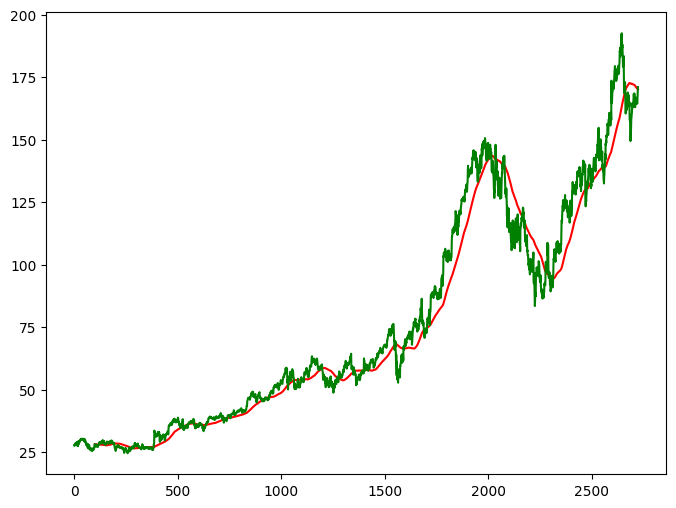

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [18]:
ma_200_days = data.Close.rolling(200).mean()

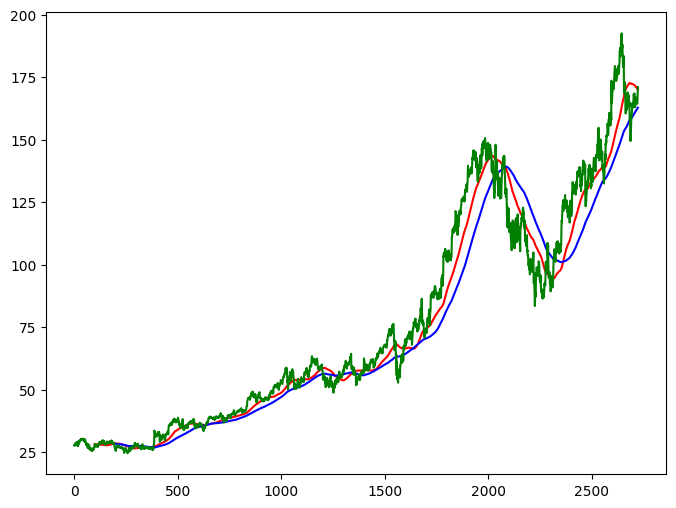

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [20]:
data.dropna(inplace=True)

In [29]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [30]:
data_train.shape[0]

2180

In [31]:
data_test.shape[0]

545

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_train_scale = scaler.fit_transform(data_train)

In [35]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [37]:
x, y = np.array(x), np.array(y)

In [38]:
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential

In [48]:
#Sequential predicts the data based on the time series
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [49]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [47]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.0872
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0087
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 0.0070
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0054
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.0056
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.0040
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0053
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0043
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0047
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0038
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.0049
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0043
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0036
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0041
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - lo

In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
pas_100_days = data_train.tail(100)

In [53]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [55]:
data_test_scale = scaler.fit_transform(data_test)

In [70]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [71]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [72]:
scale = 1/scaler.scale_

In [73]:
y_predict = y_predict*scale

In [74]:
y = y*scale

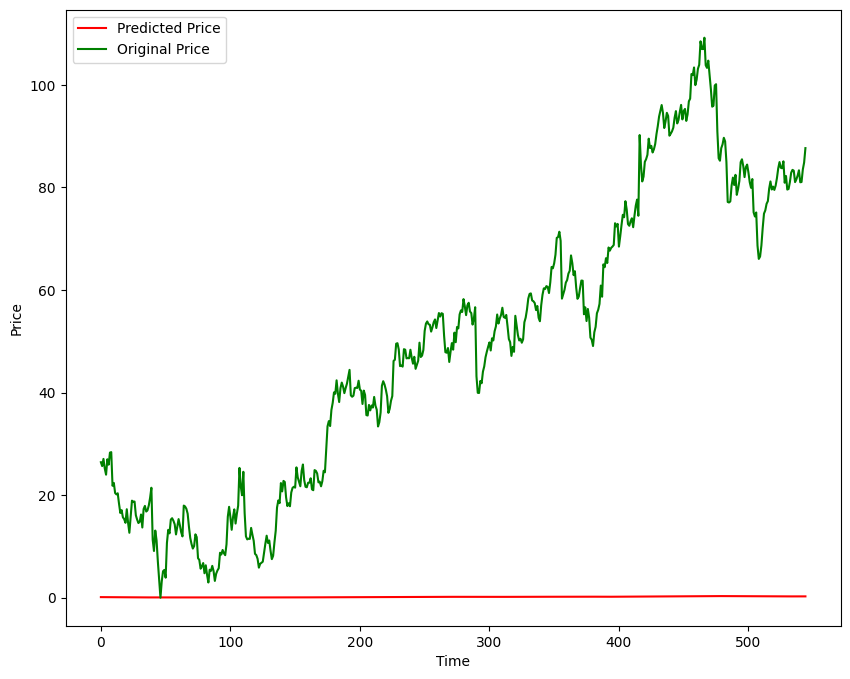

In [75]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')